<a href="https://colab.research.google.com/github/Team-Coders-5-O/Smart-compost-bin/blob/machine-learning/Soil_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gavinujayawardene","key":"3dbfff75109603c8217156b39bb18d09"}'}

In [3]:
! ~/.kaggle pwd/root

/bin/bash: /root/.kaggle: No such file or directory


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-12 09:43:06           7503        427  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indicators of Heart Disease           3MB  2022-02-16 10:18:03          12032        267  1.0              
datasets/ankanhore545/cost-of-living-index-2022                Cost of Living Index 2022                          4KB  2022-04-09 06:22:10           2507         44  0.8235294        
datasets/prasertk/best-tv-shows-of-all-time                    Best TV shows of 

In [8]:
!kaggle datasets download -d d4rklucif3r/cat-and-dogs

 94% 205M/218M [00:01<00:00, 156MB/s]
100% 218M/218M [00:01<00:00, 126MB/s]


In [9]:
! unzip cat-and-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/cats/cat.37.jpg  
  inflating: dataset/training_set/cats/cat.370.jpg  
  inflating: dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/c

In [10]:
%matplotlib inline

import os
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow as tf

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/training_set',
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/dataset/test_set',
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
Batch_Size=10
Image_Size=(224,224)
train_path='/content/dataset/training_set'
valid_path='/content/dataset/test_set'

train_dataset=tf.keras.utils.image_dataset_from_directory(train_path,shuffle=True,batch_size=Batch_Size,image_size=Image_Size)
validation_dataset=tf.keras.utils.image_dataset_from_directory(valid_path,shuffle=True,batch_size=Batch_Size,image_size=Image_Size)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                  try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                  except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'/content/dataset/test_set'
good_exts=[ 'jpeg' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  dogs
file  /content/dataset/test_set/dogs/dog.4645.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4824.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4213.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4459.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4723.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4983.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4135.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4451.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4604.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4458.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4600.jpg  has an invalid extension  jpg
file  /content/dataset/test_set/dogs/dog.4475.jpg  has an invalid extension 

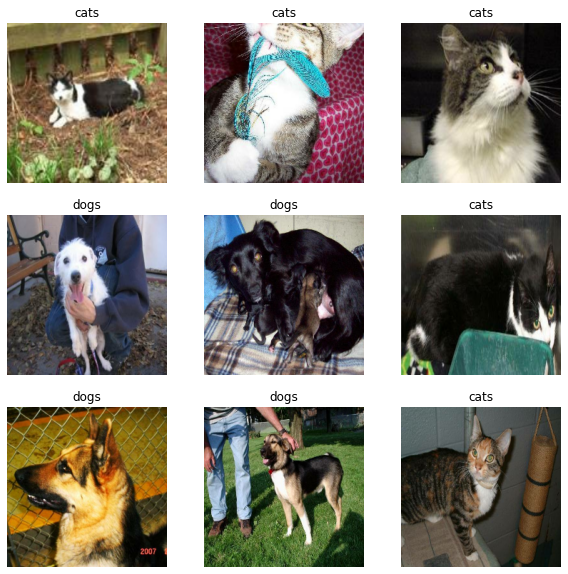

In [14]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [16]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 160
Number of test batches: 40


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [18]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

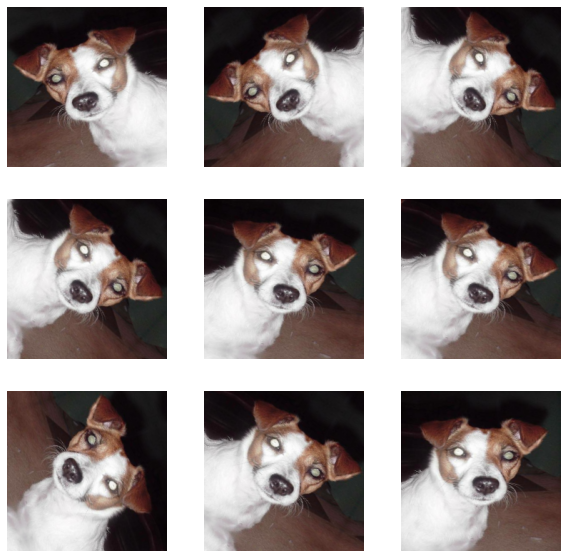

In [19]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [20]:
preprocess_input = tf.keras.applications.vgg19.preprocess_input

In [21]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [22]:
# Create the base model from the pre-trained model MobileNet V2
Image_Shape = Image_Size + (3,)
base_model = tf.keras.applications.VGG19(input_shape=Image_Shape,
                                               include_top=False,
                                               weights='imagenet')

80150528/80134624 [==============================] - 0s 0us/step


In [23]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 7, 7, 512)


In [24]:
base_model.trainable = False

In [25]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 512)


In [27]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 1)


In [28]:
inputs = tf.keras.Input(shape=(224, 224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [29]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                      

In [31]:
len(model.trainable_variables)

2

In [32]:
initial_epochs = 1 

loss0, accuracy0 = model.evaluate(validation_dataset)

160/160 [==============================] - 1009s 6s/step - loss: 3.5600 - accuracy: 0.4144


In [33]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

800/800 [==============================] - 6058s 8s/step - loss: 1.3197 - accuracy: 0.6546 - val_loss: 0.3737 - val_accuracy: 0.8725


In [34]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.56
initial accuracy: 0.41


In [37]:
history_fine = model.fit(train_dataset,
                         epochs=initial_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

800/800 [==============================] - 6059s 8s/step - loss: 0.5575 - accuracy: 0.8255 - val_loss: 0.1722 - val_accuracy: 0.9444


In [40]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

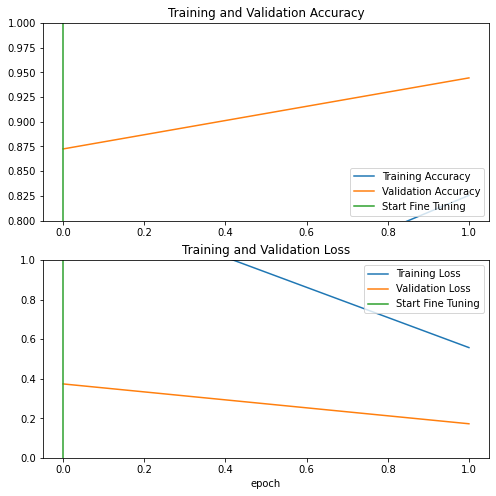

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()